In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (3).csv


In [3]:
import io
diabetes = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']), header=None)

In [4]:
diabetes.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [5]:
diabetes.shape

(759, 9)

In [6]:
inputs = diabetes.iloc[:, 0:8].values
inputs

array([[-0.294118  ,  0.487437  ,  0.180328  , ...,  0.00149028,
        -0.53117   , -0.0333333 ],
       [-0.882353  , -0.145729  ,  0.0819672 , ..., -0.207153  ,
        -0.766866  , -0.666667  ],
       [-0.0588235 ,  0.839196  ,  0.0491803 , ..., -0.305514  ,
        -0.492741  , -0.633333  ],
       ...,
       [-0.411765  ,  0.21608   ,  0.180328  , ..., -0.219076  ,
        -0.857387  , -0.7       ],
       [-0.882353  ,  0.266332  , -0.0163934 , ..., -0.102832  ,
        -0.768574  , -0.133333  ],
       [-0.882353  , -0.0653266 ,  0.147541  , ..., -0.0938897 ,
        -0.797609  , -0.933333  ]])

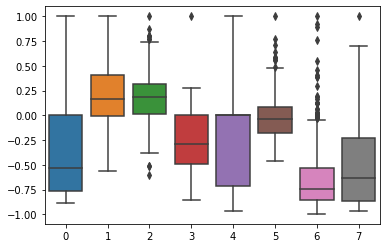

In [7]:
import seaborn as sns
# plotting box plot before preprocessing
sns.boxplot(data=inputs)

In [8]:
# preprocessing: scaling to [0,1] range
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
inputs = scaler.fit_transform(inputs)

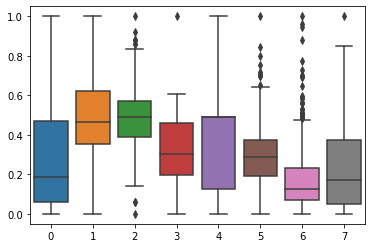

In [9]:
# plotting box plot after preprocessing to understand data.
sns.boxplot(data=inputs)

In [10]:
outputs = diabetes.iloc[:,8].values # as last column binary class label
outputs

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.20, train_size=0.80)

In [12]:
# create model
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(12,input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # compile model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train, epochs=5, batch_size=10)  # fit model

Epoch 1/5
61/61 [==============================] - 1s 2ms/step - loss: 0.7162 - accuracy: 0.4086
Epoch 2/5
61/61 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6310
Epoch 3/5
61/61 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6804
Epoch 4/5
61/61 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6903
Epoch 5/5
61/61 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.7265


In [16]:
score=model.evaluate(X_train, y_train) #evaluate the model
print("Accuracy: ")
print(score[1]*100)

19/19 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.7150
Accuracy: 
71.49917483329773


In [17]:
# changing model
model=Sequential()
model.add(Dense(12,input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, y_train, epochs=10, batch_size=10) 

Epoch 1/10
61/61 [==============================] - 1s 3ms/step - loss: 0.6878 - accuracy: 0.5832
Epoch 2/10
61/61 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6606
Epoch 3/10
61/61 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6606
Epoch 4/10
61/61 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.6606
Epoch 5/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.6623
Epoch 6/10
61/61 [==============================] - 0s 3ms/step - loss: 0.6080 - accuracy: 0.6804
Epoch 7/10
61/61 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.7051
Epoch 8/10
61/61 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.7051
Epoch 9/10
61/61 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.7183
Epoch 10/10
61/61 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.7315


In [21]:
score=model.evaluate(X_train, y_train)
print("Accuracy: ")
print(score[1]*100) # model accuracy increased with increase of epoch count.

19/19 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.7397
Accuracy: 
73.97034764289856
